## All Life Bank
## Customer Segmentation
#### Brian Hall
#### DSBA - Project 7
#### 08/25/2021

### Problem
AllLife Bank wants to focus on its credit card customer base in the next financial year. The Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. In addition the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster.

### Objective
Using clustering algorithms identify different segments in the existing customer base, based on their spending patterns as well as past interaction with the bank and provide recommendations to the bank on how to better market to and service these customers.

## Customer Segment Observations



### The customer segments produced by K-Means and Hierarchical Clustering are nearly identical, with the exception of a single observation moving groups.  Observations from EDA also help validate these clusters.
### We can be confident in these customer segments.

* **Segment 0**
     * **Overall lower average credit limits and number of credit cards, some online use, infrequent in person visits and high call volume**
     * Accounts for **33.9%** of customers
     * Much lower average credit limit and total number of credit cards than other clusters
     * Highest number of calls to the bank, avg of 6.8, that is apx 3 times higher than the next cluster
     * Moderate online usage, avg 3.5 time per year
     * Infrequent visits to the bank, avg 0.98 visits per year

* **Segment 1**
     * **Overall moderate average credit limits and number of credit cards, high in person bank visits, infrequent online usage and low call volume**
     * Accounts for **58.4%** of customers
     * Moderate credit limits and total number of credit cards
     * High frequency of in person bank visits, apx 3X higher than other other clusters
     * Very limited online usage
     * Relatively few calls to the bank compared to cluster 0
     
* **Segment 2**
     * **Overall high credit limits and number of credit cards, infrequent in person bank visits, very high online usage & very low call volume**
     * Accounts for **7.5%** of customers
     * Highest average credit limit by ~ 107,000 and number of credit cards by ~ 3
     * Very infrequent in person visits to the bank
     * Very high online usage.  3X higher than Cluster 0 and 10X higher than cluster 1
     * Infrequent calls to the bank, avg 1 per year

### Recommendations 
* The majority of customers (Segment 1 - 58%) prefer in person banking, determine why this is; age, location, distrust of online banking, etc, and what their specific needs are. Increase attention to those needs in person and develop / advertise those specific services across all channels to the same demographic.  Increase awareness of online services that meet those same needs.
* Customers with the highest credit limits and number of credit cards (Segment 2 - 7.5%) have far more online interactions with the bank and fewer visits and calls.  Perhaps the online features the bank offers are more suited to this segments needs. Advertise these services to similar demographics.
* Determine the service needs of customer segments 0 & 1 and develop online services that meet those needs.  Market those specific services to demographics similar to segment 0 and 1.
* Provide incentives to appropriate segment 1 customers to acquire more credit cards and increase credit limits, potentially focus on "high touch" services

## Data Overview
Data has been provided via xlsx file (Credit Card Customer Data.xlsx |  32.9 k)

660 Observations, 7 Features, No Duplicate Rows
    
**Data Dictionary**

* **Sl_No**: Primary key of the records
* **Customer Key**: Customer identification number
* **Average Credit Limit**: Average credit limit of each customer for all credit cards
* **Total credit cards**: Total number of credit cards possessed by the customer
* **Total visits bank**: Total number of Visits that customer made (yearly) personally to the bank
* **Total visits online**: Total number of visits or online logins made by the customer (yearly)
* **Total calls made**: Total number of calls made by the customer to the bank or its customer service department (yearly)


---
---

### Importing Libraries

In [2]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# from pandas_profiling import ProfileReport

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

### Retrieve & Examine Data

In [3]:
# Read in data and sample
ALB_orig = pd.read_excel("Credit Card Customer Data.xlsx")
alb = ALB_orig.copy()
print(f"There are {alb.shape[0]} rows and {alb.shape[1]} columns.")

np.random.seed(2021)
alb.sample(n=10)

There are 660 rows and 7 columns.


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
34,35,28254,8000,4,1,3,10
132,133,34103,12000,4,0,2,6
187,188,38205,16000,2,2,3,8
222,223,72892,20000,4,1,3,10
186,187,77143,9000,1,2,2,6
328,329,26678,14000,4,4,2,1
310,311,83459,5000,4,5,0,1
438,439,36839,31000,7,2,1,4
150,151,87471,11000,3,2,2,9
28,29,81130,5000,2,0,4,6


<IPython.core.display.Javascript object>

#### Check Data Types & Missing Values / Duplicate Rows

In [4]:
# Examine data
alb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

In [5]:
# -- Check for missing data
def findNulls(df):
    numOfNulls = df.isnull().sum().sort_values(ascending=False)
    percentOfNulls = (df.isnull().sum() / df.isnull().count()).sort_values(
        ascending=False
    )
    missingData = pd.concat(
        [numOfNulls, percentOfNulls], axis=1, keys=["numOfNulls", "percentOfNulls"]
    )
    return missingData


print(findNulls(alb))

# -- Check for duplicate rows
print("")
print("Before Duplicate Check", alb.shape)
albObj = alb
duplicateldfRow = albObj[albObj.duplicated()]
print("Duplicated Rows: ", len(duplicateldfRow))
print("")
print(duplicateldfRow)


print("")
print("After Duplicate Check", alb.shape)

                     numOfNulls  percentOfNulls
Total_calls_made              0           0.000
Total_visits_online           0           0.000
Total_visits_bank             0           0.000
Total_Credit_Cards            0           0.000
Avg_Credit_Limit              0           0.000
Customer Key                  0           0.000
Sl_No                         0           0.000

Before Duplicate Check (660, 7)
Duplicated Rows:  0

Empty DataFrame
Columns: [Sl_No, Customer Key, Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made]
Index: []

After Duplicate Check (660, 7)


<IPython.core.display.Javascript object>

* 660 Observations
* 7 Variables
* There are no variables with missing values
* There are no duplicate observations
* No variables require data type changes

* SI_No & Customer Key should be dropped as they will not add value to the segmentation


## Data Pre-Processing

In [6]:
# Dropping SI_No & Customer Key from the data set
alb.drop(columns=["Sl_No"], inplace=True)
alb.drop(columns=["Customer Key"], inplace=True)

<IPython.core.display.Javascript object>

In [7]:
alb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


<IPython.core.display.Javascript object>

The 5 remaining features fall into one of the 2 categories that we want to cluster around.
1. Spending Patterns
2. Interaction with the bank 

### Summary of Variables

In [8]:
# get a summary of the variables
alb.describe().T
# .style.highlight_max(color="pink", axis=0).highlight_min(
#     color="lightgreen", axis=0
# )

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.000,34574.242,37625.488,3000.000,10000.000,18000.000,48000.000,200000.000
Total_Credit_Cards,660.000,4.706,2.168,1.000,3.000,5.000,6.000,10.000
Total_visits_bank,660.000,2.403,1.632,0.000,1.000,2.000,4.000,5.000
Total_visits_online,660.000,2.606,2.936,0.000,1.000,2.000,4.000,15.000
Total_calls_made,660.000,3.583,2.865,0.000,1.000,3.000,5.000,10.000


<IPython.core.display.Javascript object>

* Avg_Credit_Limit has a mean of 34574.21 with a range of 3000 to 200000
* Total_Credit_Cards has a mean of 4.7 and a range of 1 to 10
* Total_visits_bank has a mean of 2.4 and a range of 0 to 5
* Total_visits_online has a mean of 2.6 and a range of 0 to 15
* Total_calls_made has a mean of 3.58 and a range of 0 to 10

**We will need to scale the data prior to modeling**

In [9]:
# check the number of unique values
alb.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
# Let's see unique values
cols = alb.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), alb[col].unique())
    print("-" * 100)

Unique values in the column 'Avg_Credit_Limit' are 

 [100000  50000  30000  20000  15000   5000   3000  10000  13000  11000
   9000   6000   8000  19000  16000  18000  17000  14000  12000   7000
  73000  49000  67000  61000  75000  48000  56000  72000  70000  51000
  69000  40000  44000  31000  37000  65000  46000  74000  58000  39000
  52000  33000  47000  71000  41000  59000  64000  45000  54000  66000
  27000  43000  36000  25000  57000  26000  38000  35000  34000  28000
  63000  29000  68000  42000  62000  32000  60000  55000 157000  94000
 163000 131000  96000 136000 121000 158000 108000 166000 176000 178000
  91000 156000 146000  84000 155000 200000 195000 187000 106000 114000
 126000 173000 153000 184000 123000 144000  97000  98000 127000 171000
 186000 183000 111000 112000 132000  95000 172000  99000 145000 167000]
----------------------------------------------------------------------------------------------------
Unique values in the column 'Total_Credit_Cards' are 

 [ 2  3 

<IPython.core.display.Javascript object>

There doesn't appear to be any values that are missing or that need to be changed prior to modeling

## EDA
### Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

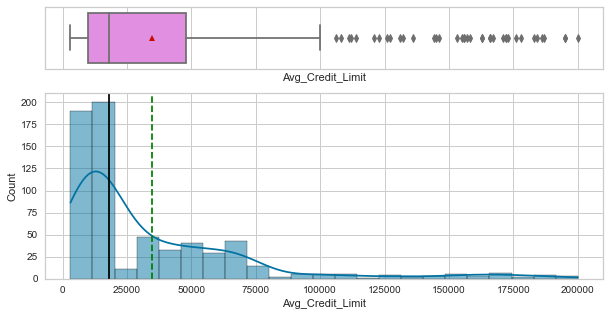

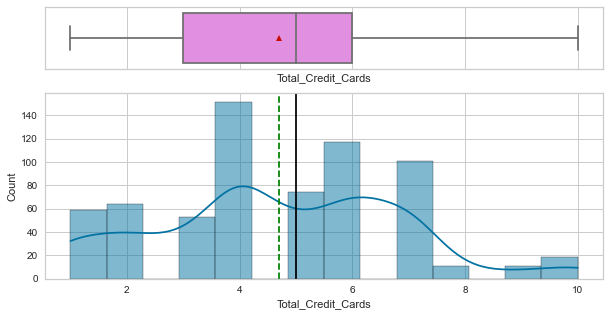

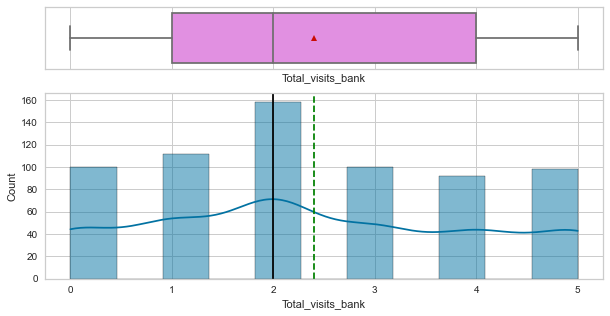

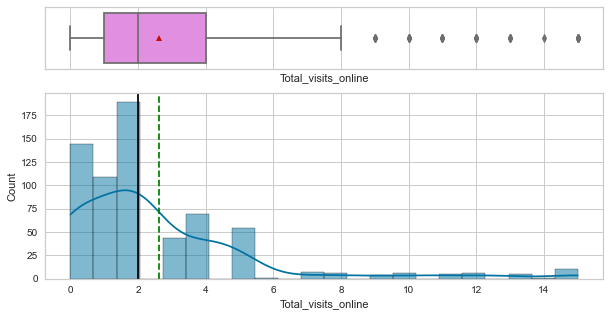

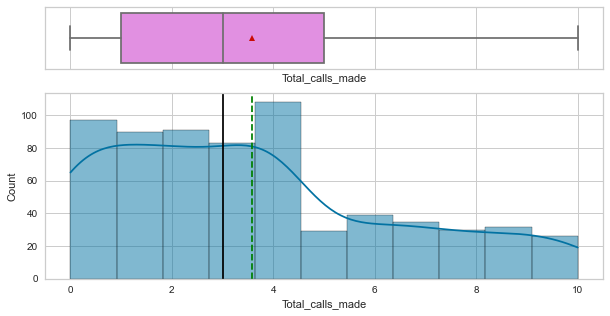

<IPython.core.display.Javascript object>

In [12]:
# selecting numerical columns
num_cols = alb.select_dtypes(include=np.number).columns.tolist()

# Plot all numerical columns
for item in num_cols:
    histogram_boxplot(alb, item, kde=True, figsize=(10, 5))
# bins=50

In [13]:
# Check credit limit outliers 
print(alb[alb["Avg_Credit_Limit"] > 100000].count())
alb[alb["Avg_Credit_Limit"] > 100000]


Avg_Credit_Limit       39
Total_Credit_Cards     39
Total_visits_bank      39
Total_visits_online    39
Total_calls_made       39
dtype: int64


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,157000,9,1,14,1
614,163000,8,1,7,1
615,131000,9,1,10,1
617,136000,8,0,13,0
618,121000,7,0,13,2
619,158000,7,0,13,0
620,108000,10,0,15,1
621,166000,9,1,12,2
622,176000,10,1,15,2
623,166000,10,0,7,0


<IPython.core.display.Javascript object>

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        # palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

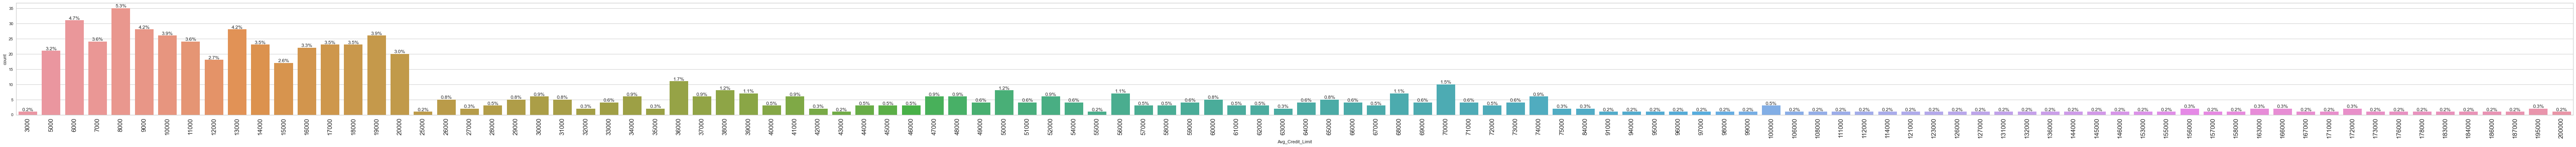

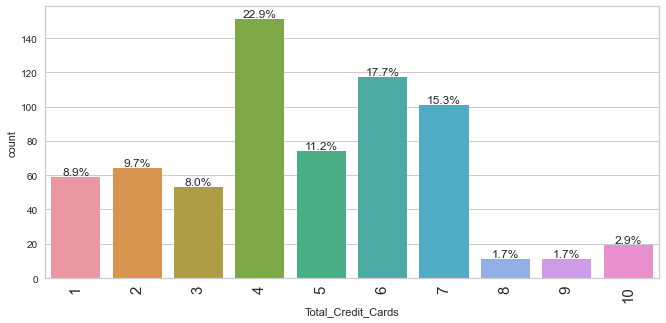

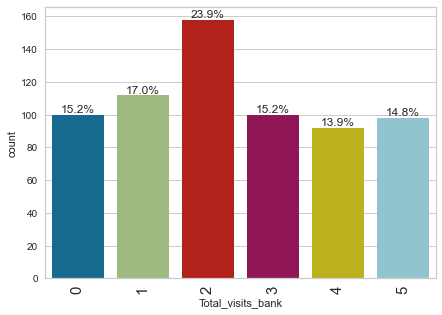

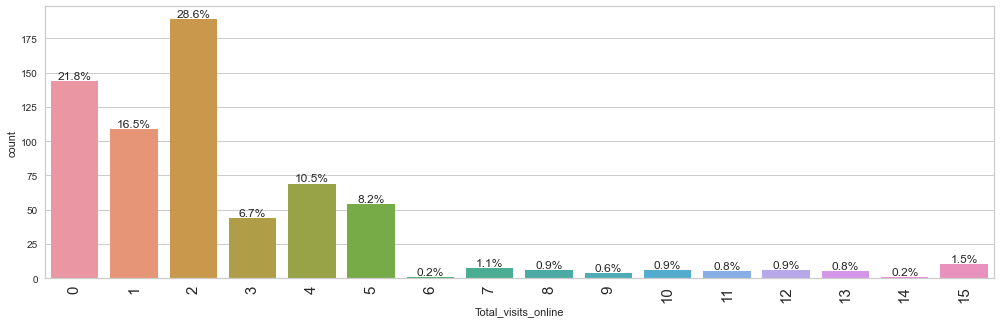

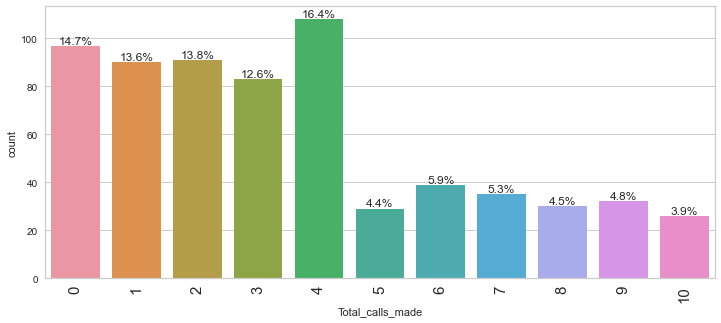

<IPython.core.display.Javascript object>

In [15]:
# barplot for all numeric columns
for item in num_cols:
    labeled_barplot(alb, item, perc=True)

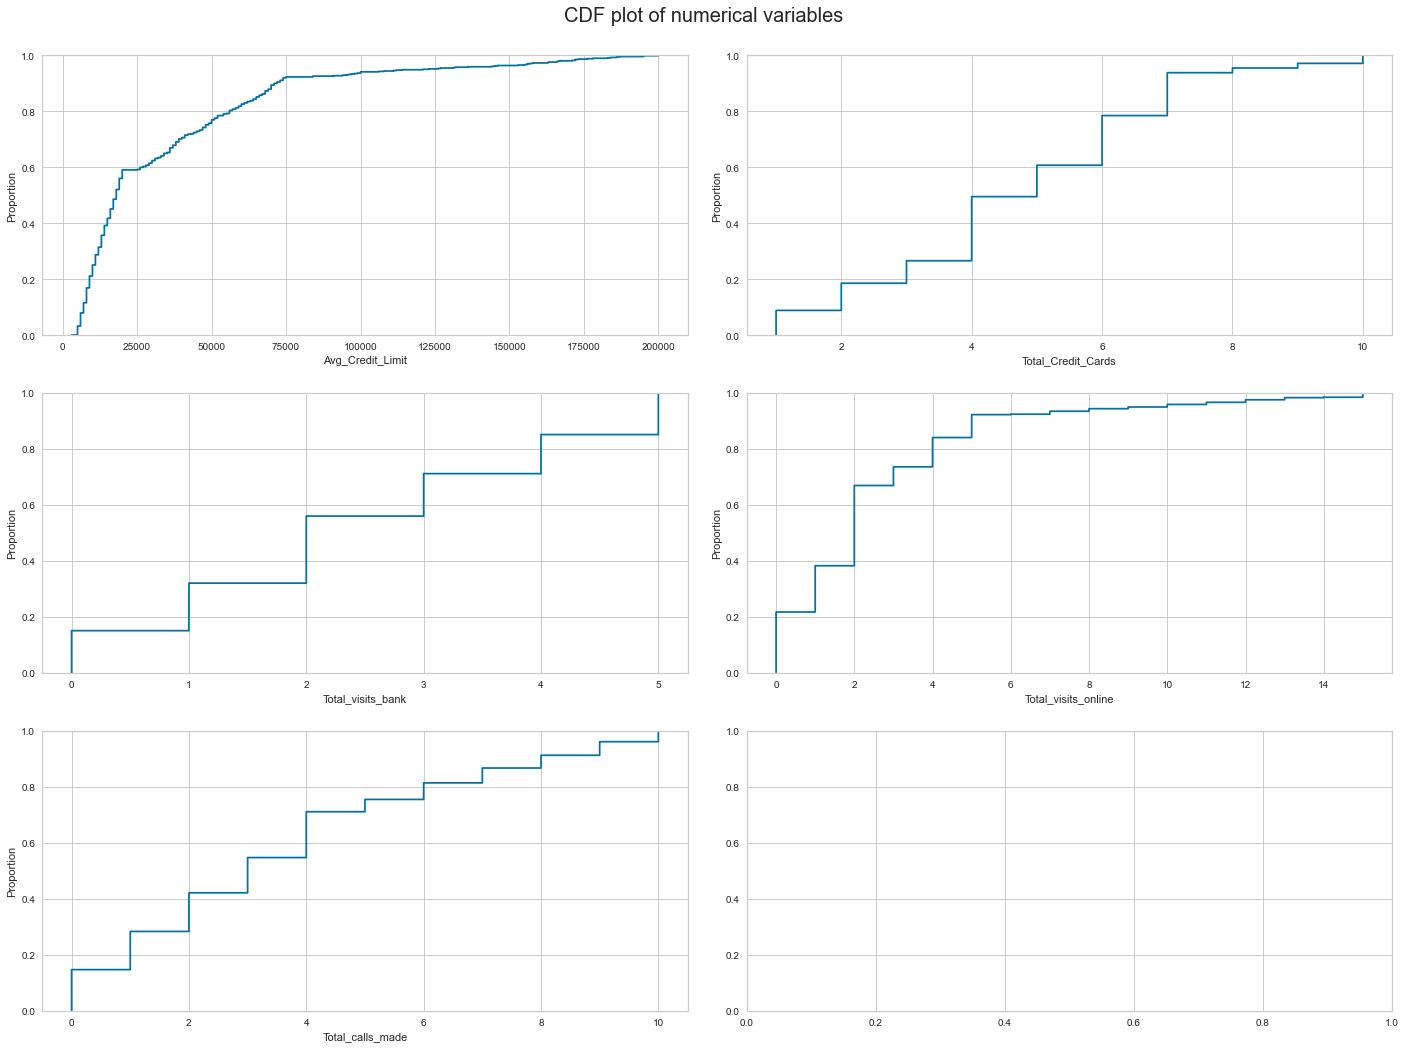

<IPython.core.display.Javascript object>

In [16]:
# plot CDF for all numeric columns
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=alb[num_cols[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=alb[num_cols[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

#### Observations
* **Avg_Credit_Limit** 
     * Right skewed
     * There are 39 outliers > 100,000 with a max of 200,000
     * Majority of customers have an average credit limit of < 25,000
     * We may need to deal with the outliers, however lets see how they impact clustering first 
* **Total_Credit_Cards**
     * More customers carry 4 credit cards with 6 & 7 cards being the next most common
     * 5 cards is the median number of cards that customers carry
     * There are no outliers
* **Total_visits_bank**
     * Range 0 to 5 with 2 visits being the most prevalent at 29%, all other number of visits range from 14% to 17%
     * There are no outliers
* **Total_visits_online**
     * Right Skewed with ~7 outliers that range from 9 to 15 an accounts for  ~ 9% of Online visits
     * Most customers visited online ~2 times throughout the year
     * 90% of the number of online visits are 5 or less
* **Total_calls_made**
     * No Outliers
     * Majority of calls ~ 57% are 4 or lass
     * Calls mean is ~ 3.5
  

### Multi-Variate Analysis

#### Check for correlations 

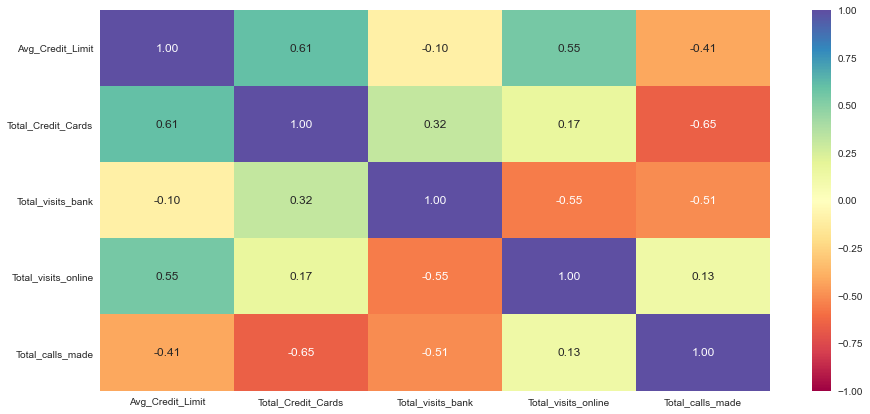

<IPython.core.display.Javascript object>

In [17]:
plt.figure(figsize=(15, 7))
sns.heatmap(alb.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Interestingly there looks to be a moderate negative correlation between Total_Credit_Cards and Total_Calls_Made
* Not suprisingly Total_Credit_Cards and Avg_Credit_Limit are moderately correlated
* Total_Visits online and Avg_Credit_Limit have a moderate correlation
* Total visits to the bank is moderately negatively correlated with visits online and calls made
* Because of the moderate correlation we are seeing, we may want to explore PCA to reduce some of it, we can check that after generating the clusters.

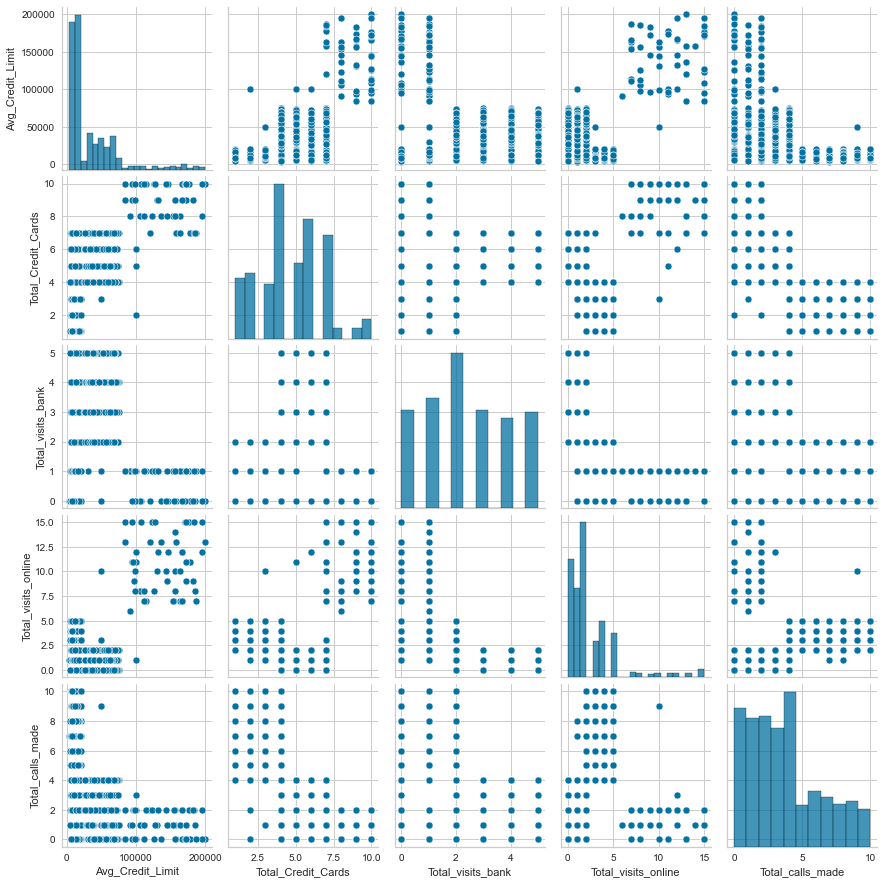

<IPython.core.display.Javascript object>

In [18]:
sns.pairplot(alb)

* There seems to be some patterns in the way the data is distributed, we will want to investigate further

* Check for patterns with Total Credit Cards

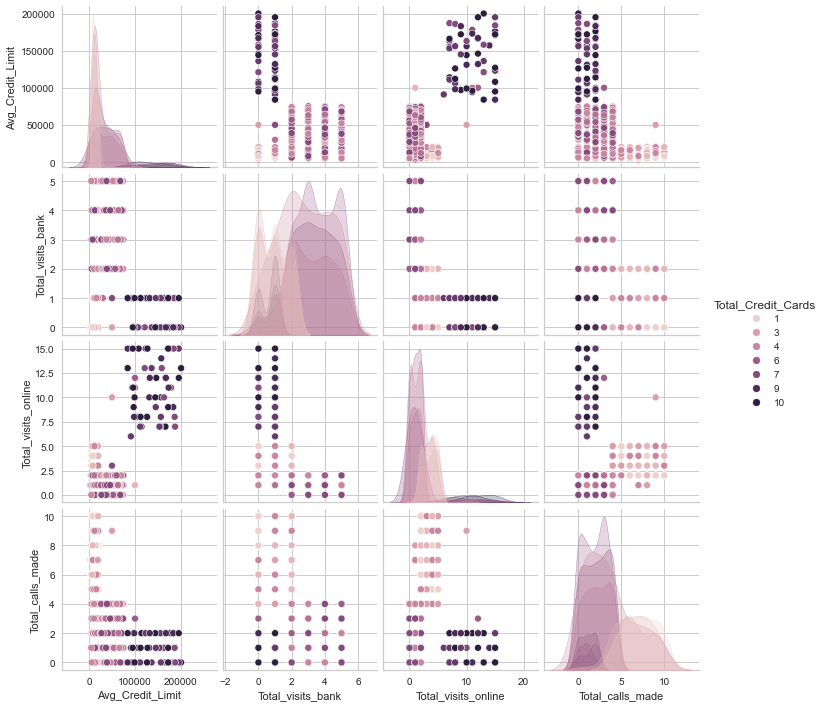

<IPython.core.display.Javascript object>

In [19]:
sns.pairplot(alb, hue="Total_Credit_Cards")

* There are distinct patterns with Total Credit Cards and several of the other features
* customers with higher credit limits and more credit cards visit the bank and call less often but have higher online utilization 

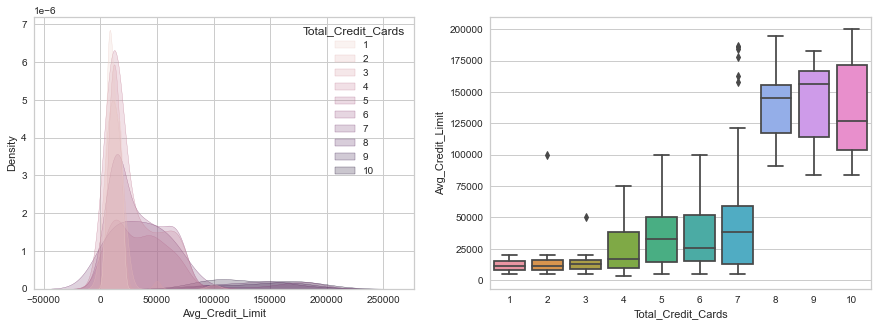

<IPython.core.display.Javascript object>

In [20]:
# Avg_Credit_Limit and Total_Credit_Cards
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(
    x="Avg_Credit_Limit", hue="Total_Credit_Cards", fill=True, data=alb, ax=ax[0]
)
sns.boxplot(x="Total_Credit_Cards", y="Avg_Credit_Limit", data=alb, ax=ax[1])
fig.show()

* Average Credit Limit increases as the total number of cards increases.  Moderately so for 4 to 7 cards and significantly so for 8 to 10 cards.
* With the exception of a few outliers customers with 3 or less cards have a credit limit below 25,000

<AxesSubplot:xlabel='Total_visits_online', ylabel='Avg_Credit_Limit'>

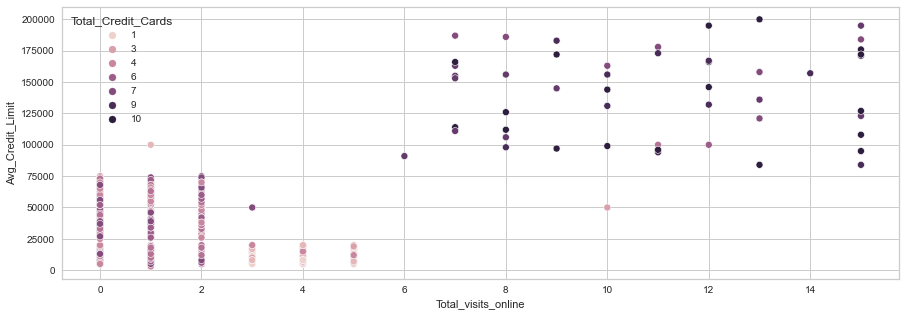

<IPython.core.display.Javascript object>

In [21]:
# Avg_Credit_Limit,Total Visits Online, Total_Credit_Cards
plt.figure(figsize=(15, 5))
sns.scatterplot(
    x="Total_visits_online",
    y="Avg_Credit_Limit",
    hue="Total_Credit_Cards",
    # palette="bright",
    data=alb,
)

* The vast majority of online visits are for customers with 7 or more credit cards

<AxesSubplot:xlabel='Total_visits_bank', ylabel='Avg_Credit_Limit'>

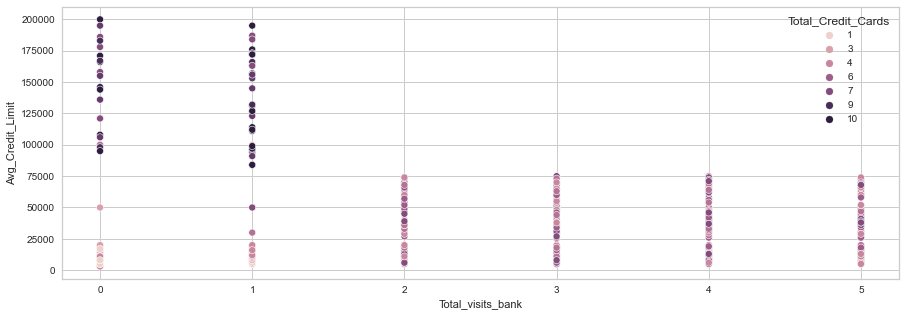

<IPython.core.display.Javascript object>

In [22]:
# Avg_Credit_Limit,Total Visits Bank, Total_Credit_Cards
plt.figure(figsize=(15, 5))
sns.scatterplot(
    x="Total_visits_bank",
    y="Avg_Credit_Limit",
    hue="Total_Credit_Cards",
    # palette="bright",
    data=alb,
)

* Those who visit the bank more often, two times or more, have lower average credit limit < 75,000 and generally have 6 or less credit cards

<AxesSubplot:xlabel='Total_calls_made', ylabel='Avg_Credit_Limit'>

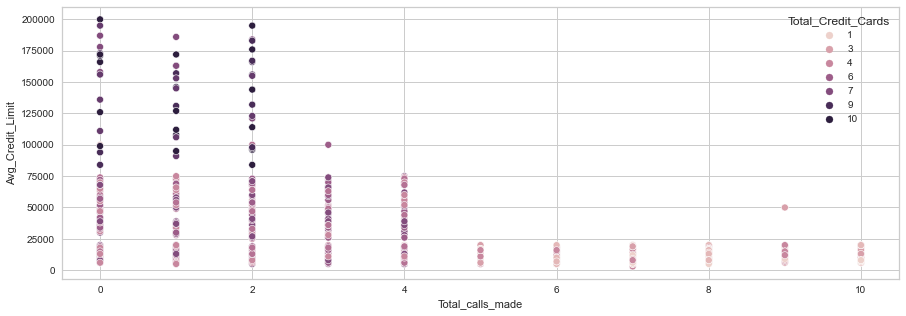

<IPython.core.display.Javascript object>

In [23]:
# Avg_Credit_Limit,Total Visits Online, Total_Credit_Cards
plt.figure(figsize=(15, 5))
sns.scatterplot(
    x="Total_calls_made",
    y="Avg_Credit_Limit",
    hue="Total_Credit_Cards",
    # palette="bright",
    data=alb,
)

* Those with higher credit limits and more cards are less likely to call the bank, rarely more than 2 times
* Those with fewer cards and lower credit limit are more likely to call the bank but seldom more than 4 times

<AxesSubplot:xlabel='Total_calls_made', ylabel='Total_visits_online'>

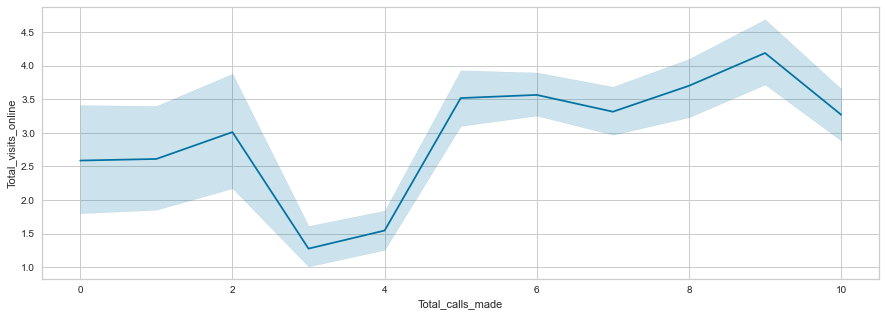

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=alb, x="Total_calls_made", y="Total_visits_online")

* Interestingly the number of online visits moderately increases after 4 calls.  This could indicate that a number of customers may be encountering difficulty with one of these methods of service.

<AxesSubplot:xlabel='Total_calls_made', ylabel='Total_visits_bank'>

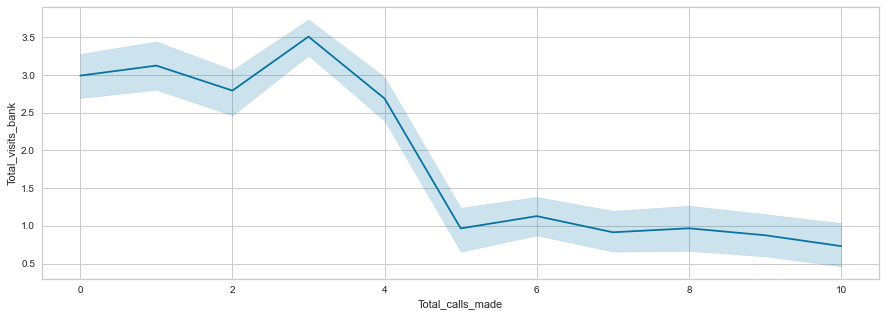

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=alb, x="Total_calls_made", y="Total_visits_bank")

* The number of visits to the bank decreases rapidly after 3 calls
* As would be expected those who visit the bank more often are less likely to call the bank

<AxesSubplot:xlabel='Total_visits_online', ylabel='Total_visits_bank'>

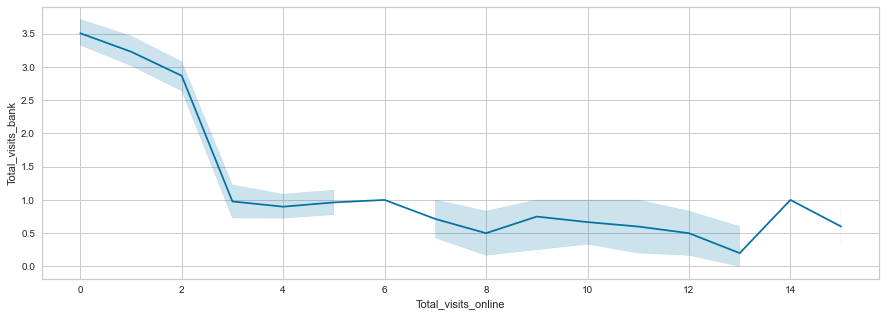

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=alb, x="Total_visits_online", y="Total_visits_bank")

* As the number of online visits increase the number of visits to the bank decreases
* There is a distinct decrease in bank visits (3.5 to 1) as the customer visits online more than twice

## EDA Key Observations

* An increase in online activity decreases the number of visits to the bank a customer makes however the number of online visits moderately increases after 4 calls. This could indicate that a number of customers may be encountering difficulty with one of these methods of services
* The Majority of customers have an average credit limit of < 25,000
* Customers with higher credit limits and more credit cards visit the bank and call less often but have higher online utilization
* Average Credit Limit increases as the total number of cards increases. Moderately so for 4 to 7 cards and significantly so for 8 to 10 cards.
* With the exception of a few outliers customers with 3 or less cards have a credit limit below 25,000
* The vast majority of online visits are for customers with 7 or more credit cards
* Those who visit the bank more often, two times or more, have lower average credit limit < 75,000 and generally have 6 or less credit cards
* Those with higher credit limits and more cards are less likely to call the bank, rarely more than 2 times
* Those with fewer cards and lower credit limit are more likely to call the bank but seldom more than 4 times
* Interestingly the number of online visits moderately increases after 4 calls. This could indicate that a number of customers may be encountering difficulty with one of these methods of service.
* The number of visits to the bank decreases rapidly after 3 calls
* As would be expected those who visit the bank more often are less likely to call the bank
* As the number of online visits increase the number of visits to the bank decreases
* There is a distinct decrease in bank visits (3 to 1) as the customer visits online more than twice
* Most customers, ~ 29%,  visited online ~2 times throughout the year
* 90% of the number of online visits are 5 or less
* The majority of customers, ~ 57%, call less than 4 times throughout the year

###  Scale Data prior to clustering
* We are initially leaving the outliers in Average Credit Limit as they seem to have some distinct patterns that could be important in identifying a valid cluster

In [27]:
# Scaling the data
scaler = StandardScaler()
subset = alb[num_cols].copy()
alb_scaled_arr = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [28]:
# Creating a dataframe from the scaled data
alb_scaled = pd.DataFrame(alb_scaled_arr, columns=subset.columns)

<IPython.core.display.Javascript object>

In [29]:
alb_scaled.sample(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
336,-0.600,-0.326,0.979,-0.207,-0.902
373,-0.760,-0.326,1.593,-0.888,-0.902
485,0.623,1.059,0.366,-0.207,-0.902
599,0.596,0.597,-0.247,-0.207,-1.252
445,0.224,1.059,1.593,-0.888,0.146
27,-0.680,-1.249,-0.247,-0.207,2.241
531,-0.068,-0.326,0.366,-0.207,-0.553
199,-0.733,-0.326,-0.247,0.475,1.892
507,0.198,0.597,0.366,-0.207,-1.252
166,-0.574,-0.326,-1.474,0.475,1.193


<IPython.core.display.Javascript object>

## K-Means Clustering

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9431306087808111
Number of Clusters: 7 	Average Distortion: 0.9225183171259892
Number of Clusters: 8 	Average Distortion: 0.889372575154107


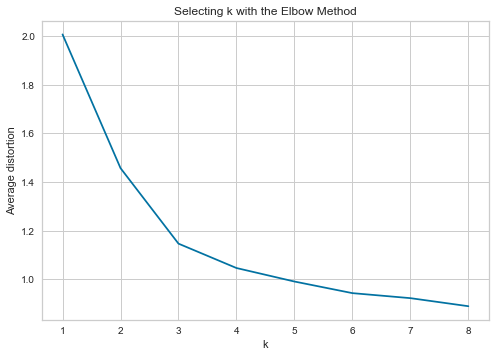

<IPython.core.display.Javascript object>

In [30]:
# Determine the average distortion for a range of clusters and plot
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(alb_scaled)
    prediction = model.predict(alb_scaled)
    distortion = (
        sum(np.min(cdist(alb_scaled, model.cluster_centers_, "euclidean"), axis=1))
        / alb_scaled.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

* There is a distinct change in K at 3 and possibly 4

#### Check silhouette scores

For n_clusters = 2, the silhouette score is 0.41842496663215445)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3556670619372605)
For n_clusters = 5, the silhouette score is 0.2726898791817692)
For n_clusters = 6, the silhouette score is 0.25583657571102003)
For n_clusters = 7, the silhouette score is 0.2485185267171653)
For n_clusters = 8, the silhouette score is 0.228805780128729)
For n_clusters = 9, the silhouette score is 0.20953829497860232)


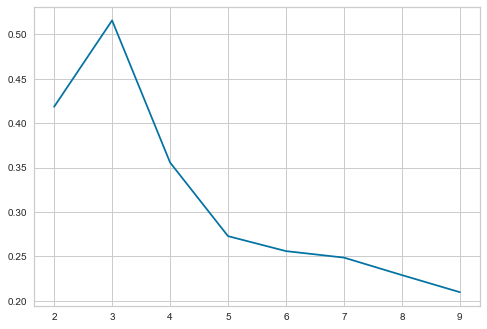

<IPython.core.display.Javascript object>

In [31]:
# Generate silhouette scores and plot
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((alb_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(alb_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

* Silhouette score is much higher for 3 than 4, so we will choose 3 as our K

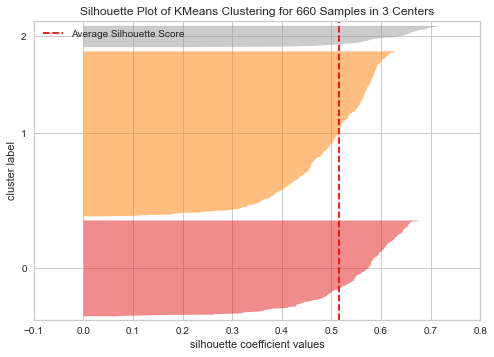

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [32]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=2021))
visualizer.fit(alb_scaled)
visualizer.show()

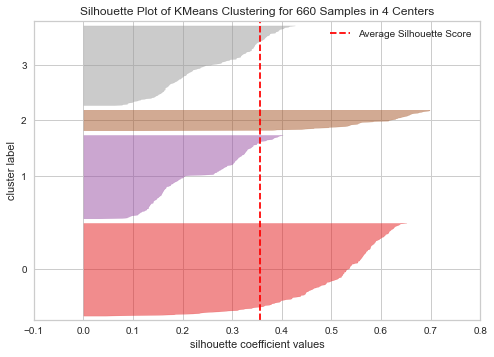

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [33]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=2021))
visualizer.fit(alb_scaled)
visualizer.show()

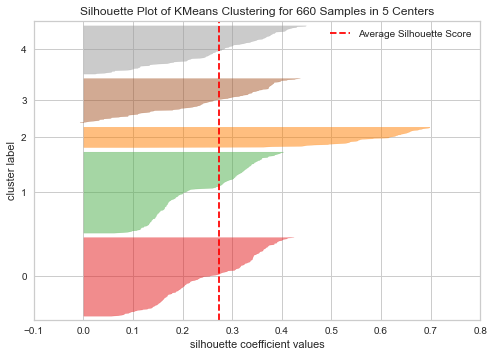

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [34]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=2021))
visualizer.fit(alb_scaled)
visualizer.show()

* **We have good silhouette scores, coefficients and a distinct change at 3 on the elbow plot for a k of 3**

In [35]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(alb_scaled)

KMeans(n_clusters=3, random_state=2021)

<IPython.core.display.Javascript object>

In [36]:
# adding kmeans cluster labels to the original and scaled dataframes

alb["K_means_segments"] = kmeans.labels_
alb_scaled["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [37]:
display(alb.head())
display(alb_scaled.head())

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,1.740,-1.249,-0.860,-0.547,-1.252,1
1,0.410,-0.788,-1.474,2.521,1.892,0
2,0.410,1.059,-0.860,0.134,0.146,1
3,-0.122,0.136,-0.860,-0.547,0.146,1
4,1.740,0.597,-1.474,3.202,-0.204,2


<IPython.core.display.Javascript object>

### K-Means Clustering Profile Quick View

In [38]:
K_cluster_profile = alb.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [39]:
K_cluster_profile["count_in_each_segment"] = (
    alb.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [40]:
alb.shape

(660, 6)

<IPython.core.display.Javascript object>

In [41]:
# let's display cluster profiles
K_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(
    color="pink", axis=0
)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

* **K-Means with 3 Clusters found very distinct groups that make sense when compared with EDA** 

### We will continue profiling K-Means Clusters alongside the final Hierarchical Clusters

## Hierarchical Clustering

In [42]:
# Make a new copy of original and scaled data without the K_means_segments
albh = alb.copy()
albh_scaled = alb_scaled.copy()
albh.drop(columns=["K_means_segments"], inplace=True)
albh_scaled.drop(columns=["K_means_segments"], inplace=True)

<IPython.core.display.Javascript object>

In [43]:
display(albh.sample(2))
display(albh_scaled.sample(2))

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
567,29000,7,3,1,1
152,15000,3,2,2,6


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
561,-0.148,1.059,1.593,-0.888,-0.553
180,-0.654,-1.711,-1.474,0.134,0.495


<IPython.core.display.Javascript object>

#### Determine what combination of distince metrics and linkage gives the highest Cophenetic Correlation

In [44]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(alb_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(alb_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8981791108157512.
Cophenetic correlation for Euclidean distance and complete linkage is 0.884420725860894.
Cophenetic correlation for Euclidean distance and average linkage is 0.9102691112621796.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9069999252384202.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8142004375043415.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8565360723350399.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9092248615295281.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9046661477870559.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8650806042953475.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6100510675083302.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8419295288198602.
Cophenetic cor

<IPython.core.display.Javascript object>

In [45]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9102691112621796, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

* **Euclidean distance** with **average linkage** has the highest Cophenetic Correlation

#### Check other linkage methods to see if we can get a better score

In [46]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(alb_scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(alb_scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8981791108157512.
Cophenetic correlation for complete linkage is 0.884420725860894.
Cophenetic correlation for average linkage is 0.9102691112621796.
Cophenetic correlation for centroid linkage is 0.906845257340526.
Cophenetic correlation for ward linkage is 0.7566252666432097.
Cophenetic correlation for weighted linkage is 0.9069999252384202.


<IPython.core.display.Javascript object>

In [47]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9102691112621796, which is obtained with average linkage.


<IPython.core.display.Javascript object>

* **Average Linkage** still has the highest cophenetic correlation with **Weighted Linkage** having the second highest score
#### We will use dendograms to visualize the different linkage methods

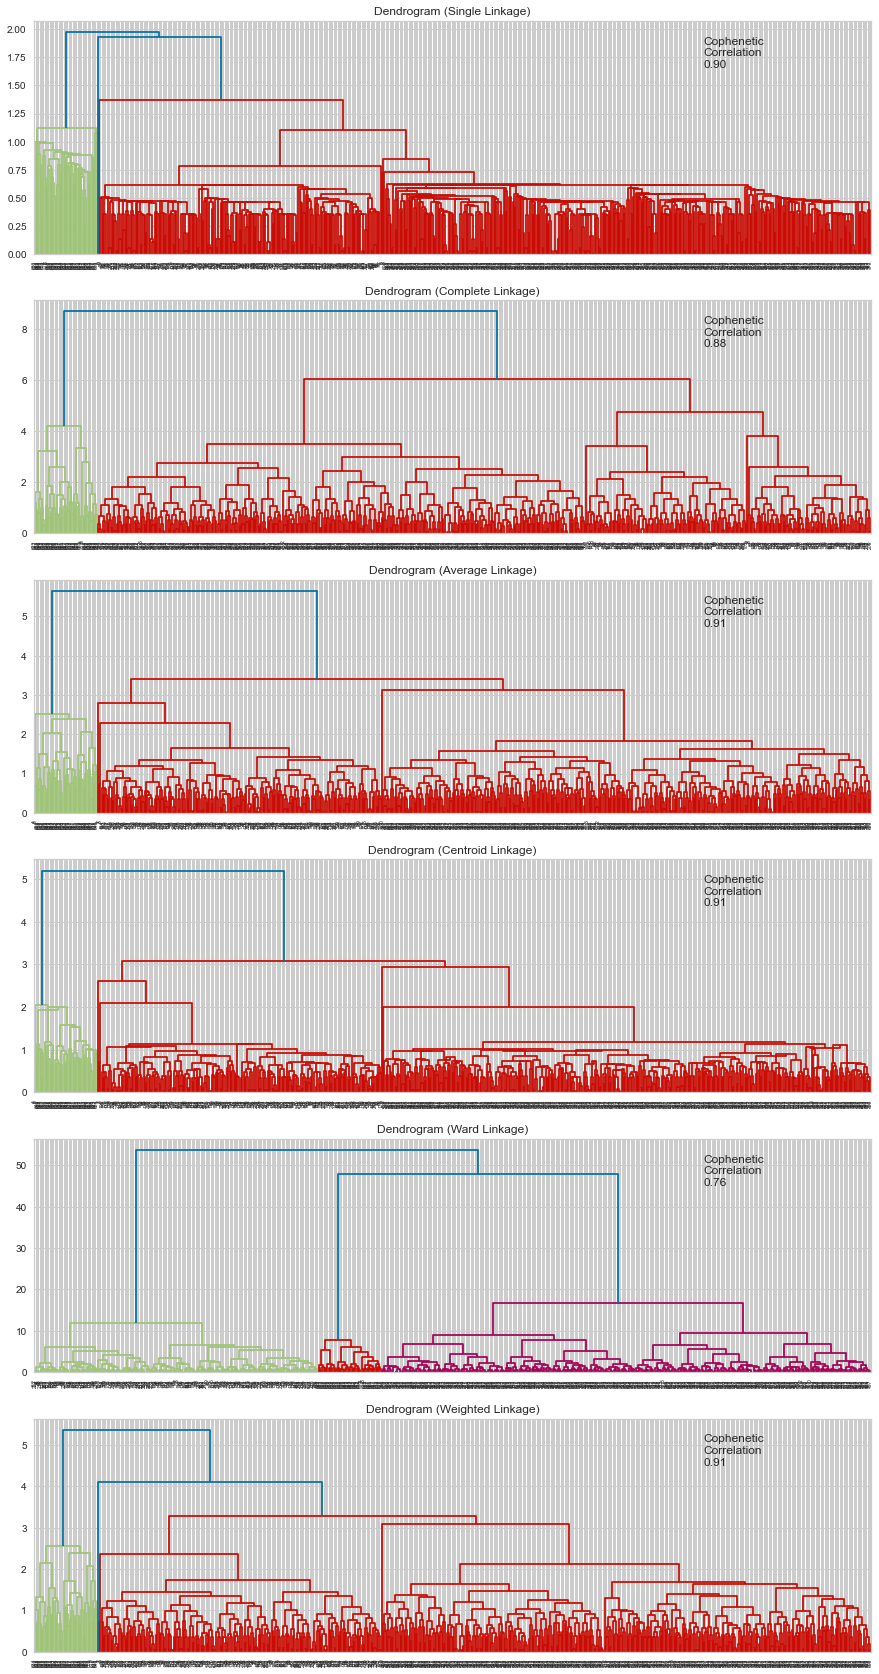

<IPython.core.display.Javascript object>

In [48]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(alb_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(alb_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Average, Centroid & Weighted** each give a Cophenetic Correlation of 0.91 with appropriate clusters for each being 3 or 4
However Ward Linkage appears to have more distinct groupings but the number of clusters would be high

#### We will look at  Average Linkage and Euclidean Distance trying 3 and 4 clusters

In [49]:
# Fitting the model with 4 clusters
aled4 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
aled4.fit(albh_scaled)

AgglomerativeClustering(linkage='average', n_clusters=4)

<IPython.core.display.Javascript object>

In [50]:
# adding hierarchical cluster labels to the original and scaled dataframes
albh_scaled["HC_Clusters"] = aled4.labels_
albh["HC_Clusters"] = aled4.labels_

<IPython.core.display.Javascript object>

In [51]:
# Check the DataFrames
display(albh.sample(4))
display(albh_scaled.sample(4))

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
430,71000,6,4,0,0,2
464,52000,4,2,1,2,2
117,17000,4,0,4,7,0
278,10000,7,4,2,4,2


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
355,-0.654,0.136,1.593,-0.547,0.146,2
552,0.809,1.059,0.366,-0.207,-0.902,2
188,-0.467,-1.249,-1.474,0.134,0.495,0
616,1.634,2.444,-0.860,2.861,-0.553,1


<IPython.core.display.Javascript object>

### Hierarchical Cluster Profiles (4 clusters, average linkage, euclidean distance)

In [52]:
aled4_profile = albh.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [53]:
aled4_profile["count_in_each_segments"] = (
    albh.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [54]:
# let's display cluster profiles
aled4_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(
    color="pink", axis=0
)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,12197.309417,2.403587,0.928251,3.560538,6.883408,223
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,33541.450777,5.520725,3.492228,0.984456,2.010363,386
3,100000.000000,2.000000,1.000000,1.000000,0.000000,1


<IPython.core.display.Javascript object>

* Hierarchical clustering with 4 clusters, average linkage & euclidean distance have produced clusters that are nearly identical to our K-Means clusters with the exception of a cluster containing 1 observation. 
#### We will create another hierarchical cluster using the same distance metrics and linkage and 3 clusters

In [55]:
# Make a new copy of original and scaled data without HC_Clusters
albh3 = albh.copy()
albh3_scaled = albh_scaled.copy()
albh3.drop(columns=["HC_Clusters"], inplace=True)
albh3_scaled.drop(columns=["HC_Clusters"], inplace=True)
display(albh3.head(1))
display(albh3_scaled.head(1))

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740,-1.249,-0.860,-0.547,-1.252


<IPython.core.display.Javascript object>

In [56]:
# Fitting the model with 3 clusters
aled3 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
aled3.fit(albh_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

<IPython.core.display.Javascript object>

In [57]:
# adding hierarchical cluster labels to the original and scaled dataframes
albh3_scaled["HC_Clusters"] = aled3.labels_
albh3["HC_Clusters"] = aled3.labels_

<IPython.core.display.Javascript object>

In [58]:
display(albh3.head(1))
display(albh3_scaled.head(1))

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
0,100000,2,1,1,0,0


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
0,1.740,-1.249,-0.860,-0.547,-1.252,0


<IPython.core.display.Javascript object>

In [59]:
aled3_profile = albh3.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [60]:
aled3_profile["count_in_each_segments"] = (
    albh3.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

### HC Profiles (3 clusters, average linkage, euclidean distance)

In [61]:
# let's display cluster profiles
aled3_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(
    color="pink", axis=0
)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


<IPython.core.display.Javascript object>

### K-Means Clusters for comparison

In [62]:
# let's display cluster profiles
K_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(
    color="pink", axis=0
)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

#### Clusters for Hierarchical and K-Means are nearly identical with the exception of 1 observation moving to a different group.
#### We will consider this our final HC model and profile K-Means Clusters and Hierarchical Clusters side by side for comparison

--------------------
-------------------

### Rename HC model cluster names to match K-Means cluster names for easier comparison

In [63]:
# Rename HC model cluster names to match K-Means cluster names for easier comparison
albh3_remap = albh3.replace({"HC_Clusters": {0: 1, 1: 2, 2: 0}})
albh3_remap_scaled = albh3_scaled.replace({"HC_Clusters": {0: 1, 1: 2, 2: 0}})

<IPython.core.display.Javascript object>

In [64]:
albh3

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


<IPython.core.display.Javascript object>

In [65]:
albh3_remap

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2
...,...,...,...,...,...,...
655,99000,10,1,10,0,2
656,84000,10,1,13,2,2
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2


<IPython.core.display.Javascript object>

In [66]:
aled3_remap_profile = albh3_remap.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [67]:
aled3_remap_profile["count_in_each_segments"] = (
    albh3_remap.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

## Cluster Profiles
### We will profile K-Means and Hierarchical side by side

### K-Means cluster mean values

In [68]:
# let's display cluster profiles
K_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(
    color="pink", axis=0
)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

### Hierarchical cluster mean values

In [69]:
# let's display cluster profiles
aled3_remap_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(
    color="pink", axis=0
)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,12197.309417,2.403587,0.928251,3.560538,6.883408,223
1,33713.178295,5.511628,3.485788,0.984496,2.005168,387
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

In [70]:
# Function to create percentages for count plots - categorical attributes
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)
    plt.show()

<IPython.core.display.Javascript object>

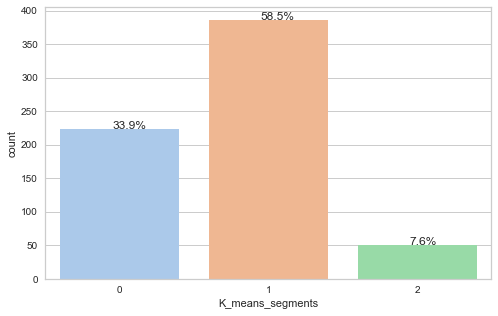

<IPython.core.display.Javascript object>

In [71]:
# plot Income_Category
plt.figure(figsize=(8, 5))
ax = sns.countplot(alb["K_means_segments"], palette="pastel")
perc_on_bar(ax, alb["K_means_segments"])

### K-Means Box Plots

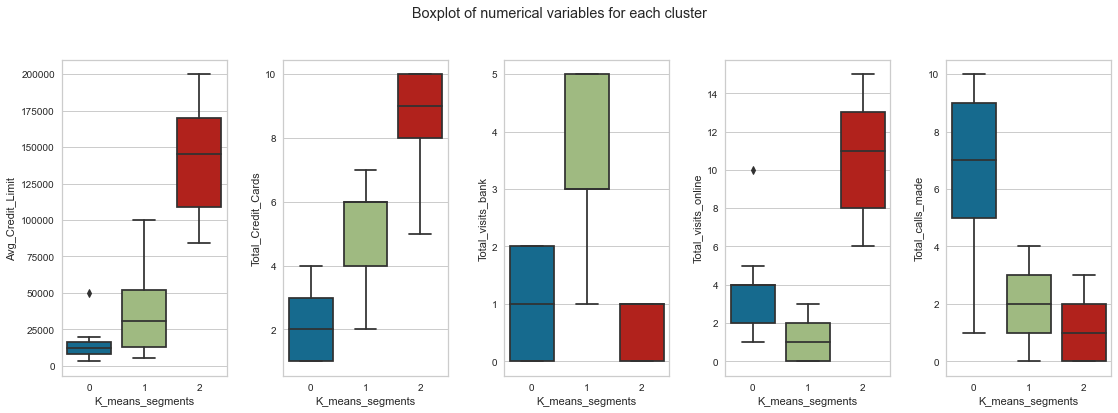

<IPython.core.display.Javascript object>

In [72]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=alb[num_cols[counter]], x=alb["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Hierarchical cluster Box Plots

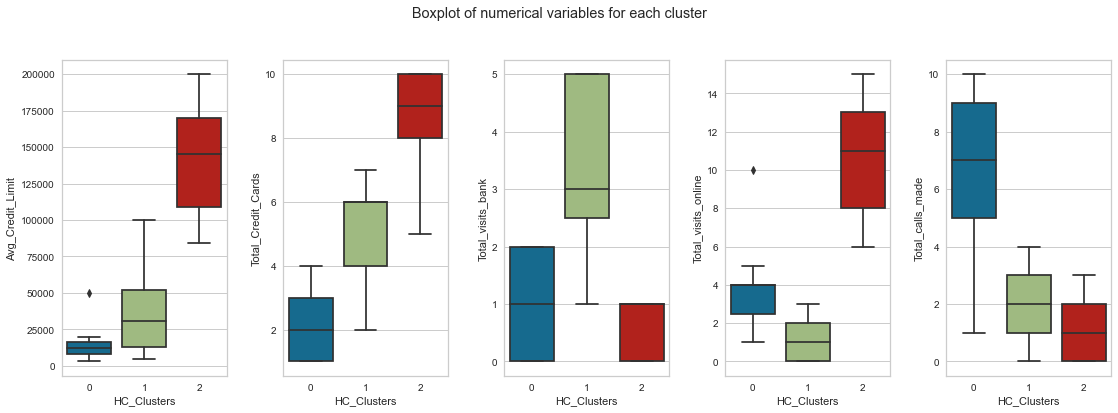

<IPython.core.display.Javascript object>

In [73]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=albh3_remap[num_cols[counter]], x=albh3_remap["HC_Clusters"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### K-Means Bar Plot (on scaled data)

<AxesSubplot:xlabel='K_means_segments'>

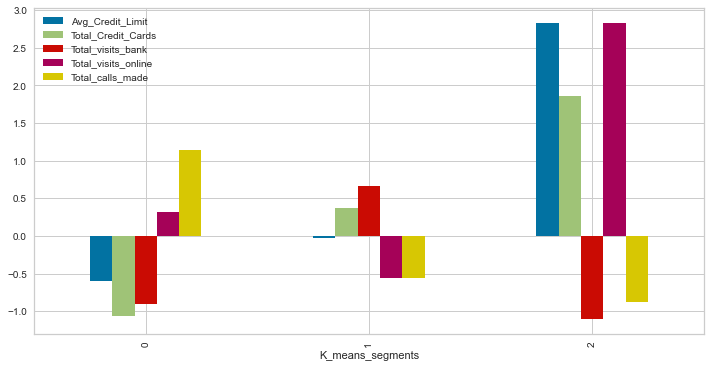

<IPython.core.display.Javascript object>

In [74]:
alb_scaled.groupby("K_means_segments").mean().plot.bar(figsize=(12, 6))

### Hierarchical Cluster Bar Plot (on scaled data)

<AxesSubplot:xlabel='HC_Clusters'>

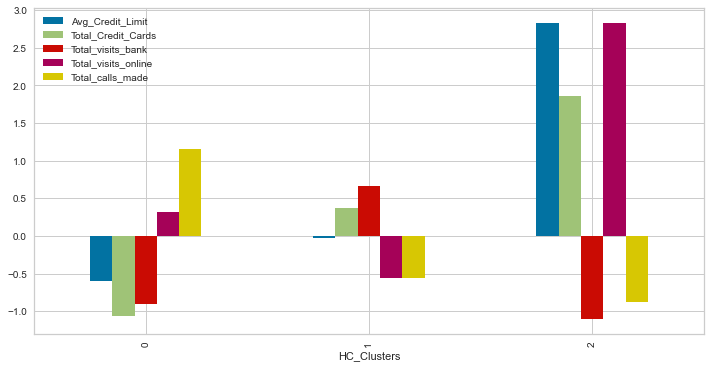

<IPython.core.display.Javascript object>

In [75]:
albh3_remap_scaled.groupby("HC_Clusters").mean().plot.bar(figsize=(12, 6))

#### Compare clusters for K-Means and Hierarchical  in a pairplot and see what overlap looks like

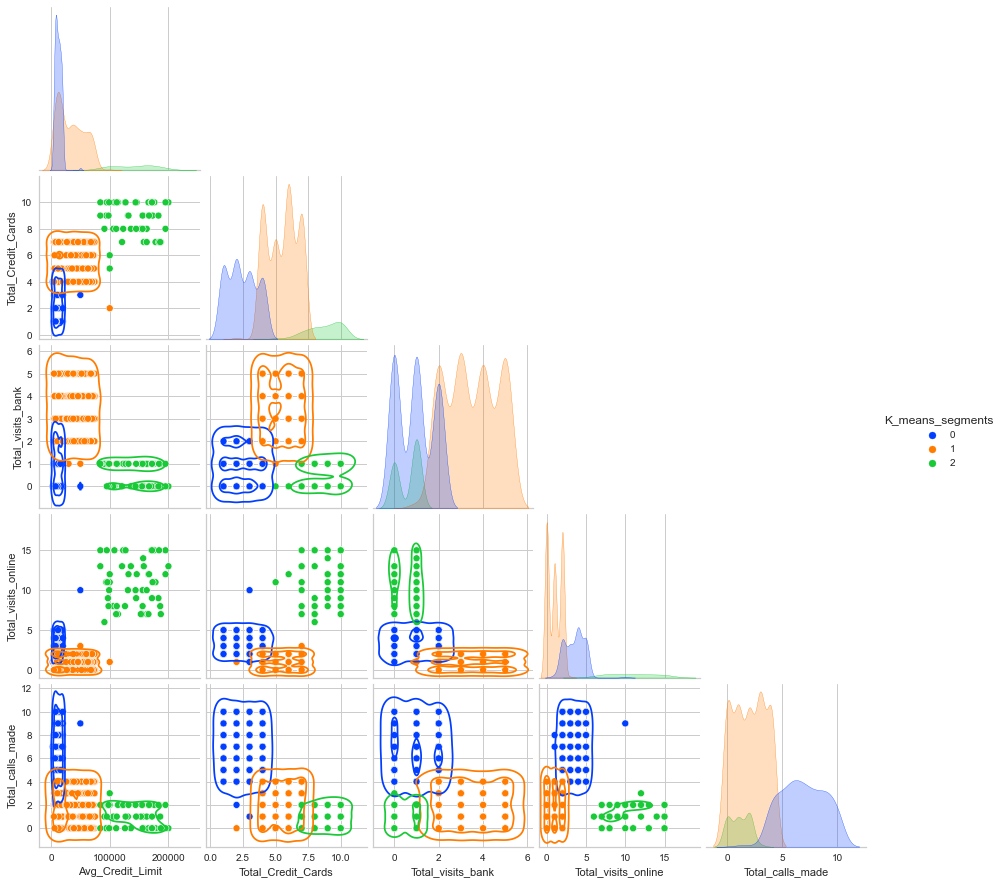

<IPython.core.display.Javascript object>

In [114]:
# let's see if there is any overlap in the clusters for K-Means
g = sns.pairplot(
    alb[
        [
            "Avg_Credit_Limit",
            "Total_Credit_Cards",
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
            "K_means_segments",
        ]
    ],
    diag_kind="kde",
    corner=True,
    hue="K_means_segments",
    palette="bright",
)
g.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()

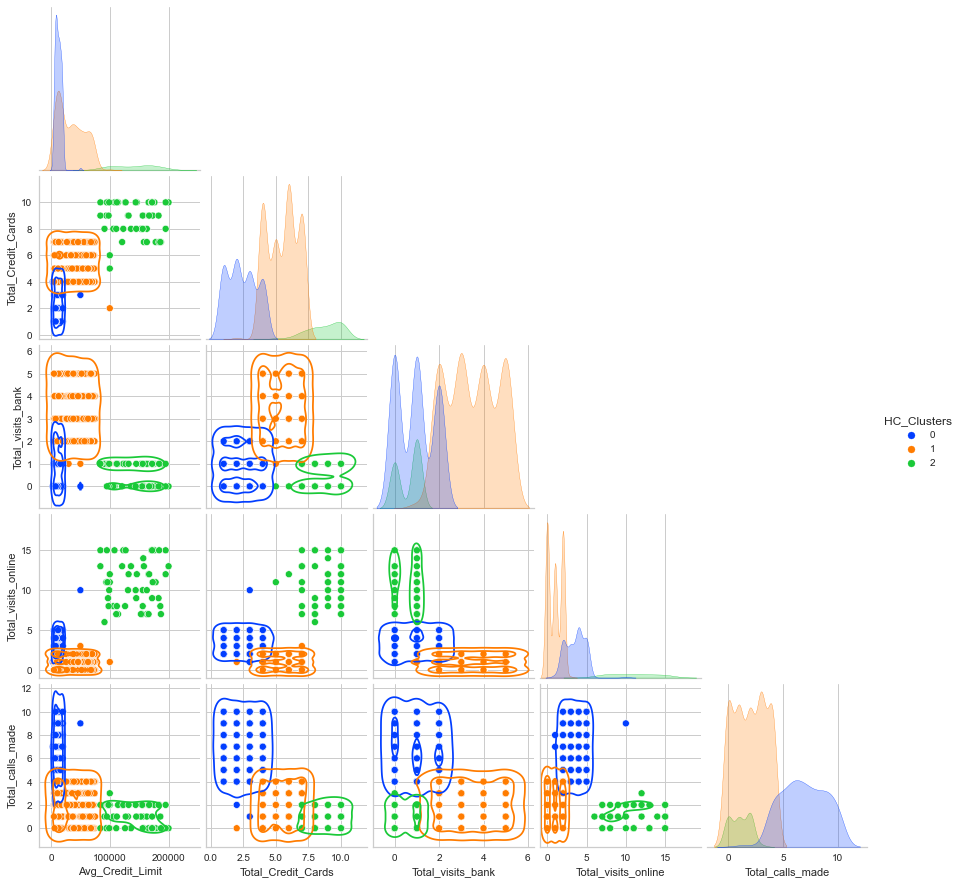

<IPython.core.display.Javascript object>

In [118]:
# let's see if there is any overlap in the clusters for Hierarchical Clusters
g = sns.pairplot(
    albh3_remap[
        [
            "Avg_Credit_Limit",
            "Total_Credit_Cards",
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
            "HC_Clusters",
        ]
    ],
    diag_kind="kde",
    corner=True,
    hue="HC_Clusters",
    palette="bright",
)
g.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()

* The clusters look to be identical in the way they are distributed for both K-Means and Hierarchical.
* There is some overlap between clusters however it does not appear to be much

### Given that K-Means and Hierarchical Clusters are nearly identical, with the exception of a single observation moving groups, we will describe both sets of clusters the same

* **Cluster 0**
     * **Overall lower average credit limits and number of credit cards, some online use, infrequent in person visits and high call volume**
     * Accounts for **33.9%** of customers
     * Much lower average credit limit and total number of credit cards than other clusters
     * Highest number of calls to the bank, avg of 6.8, that is apx 3 times higher than the next cluster
     * Moderate online usage, avg 3.5 time per year
     * Infrequent visits to the bank, avg 0.98 visits per year

* **Cluster 1**
     * **Overall moderate average credit limits and number of credit cards, high in person bank visits, infrequent online usage and low call volume**
     * Accounts for **58.4%** of customers
     * Moderate credit limits and total number of credit cards
     * High frequency of in person bank visits, apx 3X higher than other other clusters
     * Very limited online usage
     * Relatively few calls to the bank compared to cluster 0
     
* **Cluster 2**
     * **Overall high credit limits and number of credit cards, infrequent in person bank visits, very high online usage & very low call volume**
     * Accounts for **7.5%** of customers
     * Highest average credit limit by ~ 107,000 and number of credit by ~ 3
     * Very infrequent in person visits to the bank
     * Very high online usage.  3X higher than Cluster 0 and 10X higher than cluster 1
     * Infrequent calls to the bank, avg 1 per year
     

### Recommendations 
* The majority of customers (Segment 1 - 58%) prefer in person banking, determine why this is; age, location, distrust of online banking, etc, and what their specific needs are. Increase attention to those needs in person and develop / advertise those specific services across all channels to the same demographic.  Increase awareness of online services that meet those same needs.
* Customers with the highest credit limits and number of credit cards (Segment 2 - 7.5%) have far more online interactions with the bank and fewer visits and calls.  Perhaps the online features the bank offers are more suited to this segments needs. Advertise these services to similar demographics.
* Determine the service needs of customer segments 0 & 1 and develop online services that meet those needs.  Market those specific services to demographics similar to segment 0 and 1.
* Provide incentives to appropriate segment 1 customers to acquire more credit cards and increase credit limits, potentially focus on "high touch" services